In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
house_prices = pd.read_excel('C:/Users/Khang/OneDrive/Desktop/Group Project 1/City_MedianListingPrice_AllHomes3.xlsx')
house_prices.head()

,Row Labels,Sum of Sum,Count of CountyName,Grand Total
0,Santa Barbara County,8622827.09,7,1231832.44
1,Santa Clara County,9977733.70,10,997773.37
2,San Francisco County,979054.04,1,979054.04
3,Monterey County,5812742.01,7,830391.72
4,San Mateo County,4727599.79,6,787933.30


In [27]:
income = pd.read_excel('C:/Users/Khang/OneDrive/Desktop/Group Project 1/income avarage.xlsx')
income.head()

,Row Labels,2014,2015,2016,Grand Total,Average
0,Alameda County,73775,75619,79831,301337,75334.25
1,Alpine County,61343,52917,62375,235271,58817.75
2,Amador County,52964,54171,57032,217851,54462.75
3,Butte County,43165,43444,44366,174727,43681.75
4,Calaveras County,54936,53233,53502,216966,54241.50


In [28]:
new_df = pd.merge(house_prices, income, on='Row Labels', how='inner')
new_df.columns

Index([         'Row Labels',          'Sum of Sum', 'Count of CountyName',
             'Grand Total_x',                  2014,                  2015,
                        2016,       'Grand Total_y',             'Average'],
      dtype='object')

In [29]:
rename_df = new_df.rename(columns={'Grand Total_y': 'Total_Income', 'Average': 'Grand Total_Income', 'Grand Total_x': 
                                  'Grand Total_Housing', 2014 : 'Income_2014', 2015: 'Income_2015', 2016: 'Income_2016'})
rename_df.head()



,Row Labels,Sum of Sum,Count of CountyName,Grand Total_Housing,Income_2014,Income_2015,Income_2016,Total_Income,Grand Total_Income
0,Santa Barbara County,8622827.09,7,1231832.44,63409,63985,65161,255334,63833.50
1,Santa Clara County,9977733.70,10,997773.37,93854,96310,101173,383039,95759.75
2,San Francisco County,979054.04,1,979054.04,78378,81294,87701,322977,80744.25
3,Monterey County,5812742.01,7,830391.72,58582,58783,60889,237422,59355.50
4,San Mateo County,4727599.79,6,787933.30,91421,93623,98546,371792,92948.00


In [30]:
rename_df['Ratio']= rename_df['Grand Total_Housing']/rename_df['Grand Total_Income']
rename_df.head()



,Row Labels,Sum of Sum,Count of CountyName,Grand Total_Housing,Income_2014,Income_2015,Income_2016,Total_Income,Grand Total_Income,Ratio
0,Santa Barbara County,8622827.09,7,1231832.44,63409,63985,65161,255334,63833.50,19.297586
1,Santa Clara County,9977733.70,10,997773.37,93854,96310,101173,383039,95759.75,10.419549
2,San Francisco County,979054.04,1,979054.04,78378,81294,87701,322977,80744.25,12.125372
3,Monterey County,5812742.01,7,830391.72,58582,58783,60889,237422,59355.50,13.990139
4,San Mateo County,4727599.79,6,787933.30,91421,93623,98546,371792,92948.00,8.477141


In [31]:
rename_df.sort_values(by=['Ratio'],inplace=True)
plot_data = rename_df.drop(['Sum of Sum', 'Count of CountyName', 'Total_Income', 'Income_2014', 'Income_2015', 'Income_2016'], axis=1)
plot_ratio = plot_data.head(20)
plot_bar = plot_data.drop(['Ratio'], axis=1)
plot_bar1 = plot_bar.head(20)

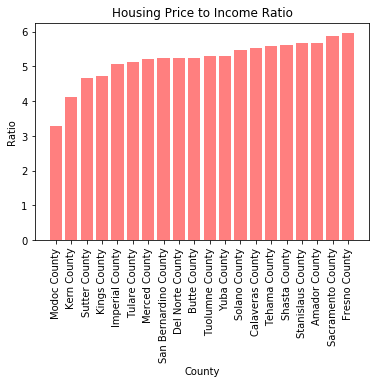

In [32]:
x_axis = np.arange(len(plot_ratio))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, plot_ratio["Ratio"], color='r', alpha=0.5)
plt.xticks(tick_locations, plot_data["Row Labels"], rotation="vertical")
plt.title("Housing Price to Income Ratio")
plt.xlabel("County")
plt.ylabel("Ratio")
plt.savefig("C:/Users/Khang/OneDrive/Desktop/Group Project 1/ratio.png")

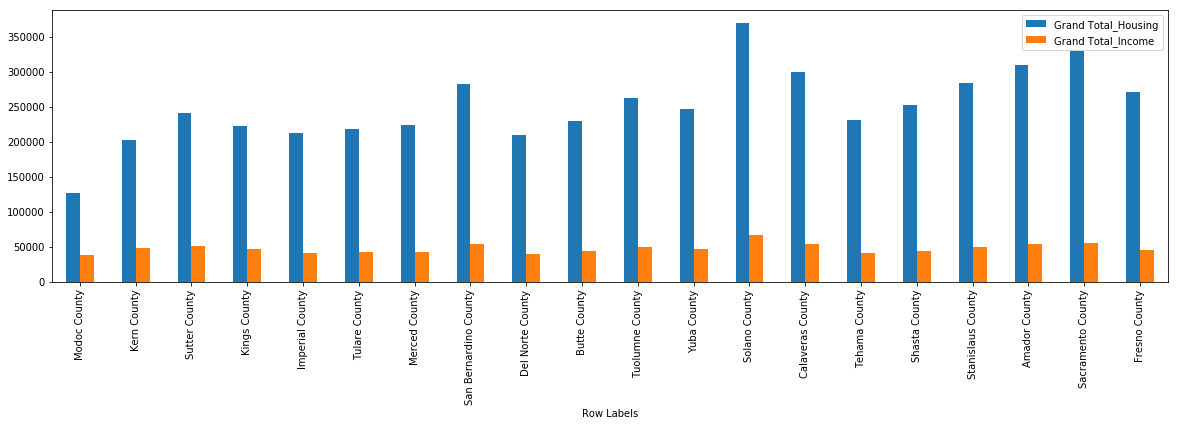

In [33]:
plot_bar1 = plot_bar1.set_index('Row Labels')
multi_plot = plot_bar1.plot(kind="bar", figsize=(20,5))
plt.savefig("C:/Users/Khang/OneDrive/Desktop/Group Project 1/housingvsincome.png")

In [34]:
plot_bar1 = plot_bar.head(10)
Points = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
#rename_df['Score']= Points
plot_bar1['Score']= Points
plot_bar1


C:\Users\Khang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Row Labels,Grand Total_Housing,Grand Total_Income,Score
51,Modoc County,126564.58,38456.50,10
50,Kern County,202348.44,48985.00,9
42,Sutter County,241499.42,51723.75,8
46,Kings County,222999.40,47299.00,7
48,Imperial County,212545.38,41804.50,6
47,Tulare County,218202.33,42597.75,5
45,Merced County,224596.40,43129.00,4
34,San Bernardino County,282924.10,54023.00,3
49,Del Norte County,210577.34,40105.25,2
44,Butte County,229671.54,43681.75,1


In [24]:
plot_bar1.to_excel("C:/Users/Khang/OneDrive/Desktop/Group Project 1/plot_bar1.xlsx", index=False, header=True)